In [15]:
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain.schema import Document

import base64
import os
from PIL import Image

from dotenv import load_dotenv
load_dotenv()

True

In [2]:
loader = PyPDFLoader('C:/project4/chat/RAG데이터2.pdf')
docs = loader.load()

print(type(docs))

<class 'list'>


In [3]:
len(docs)

11

(1110, 879)


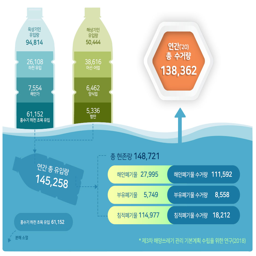

(640, 357)


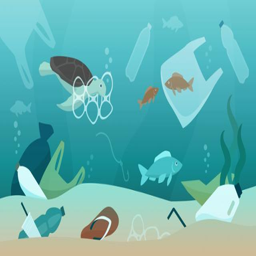

(590, 360)


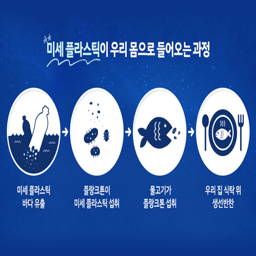

(747, 421)


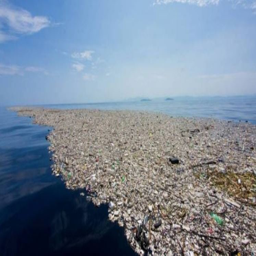

(680, 361)


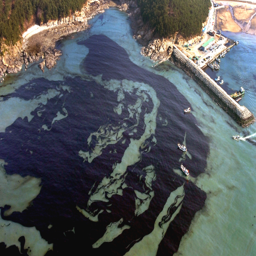

(700, 525)


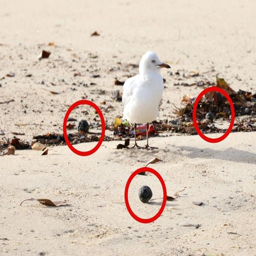

(800, 533)


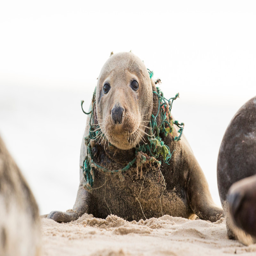

(1755, 696)


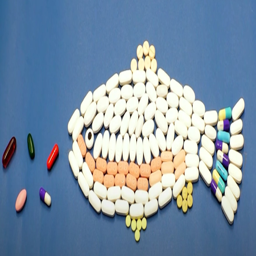

(640, 353)


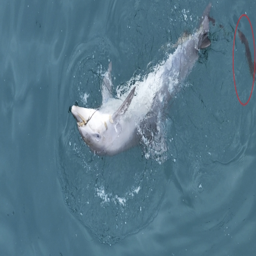

(1080, 607)


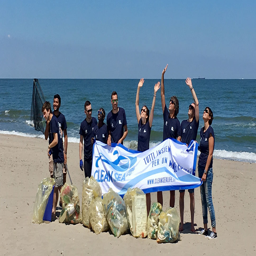

(600, 409)


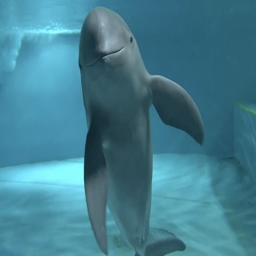

In [4]:
path = 'C:/project4/chat/images/'
for i in range(11):
    try:
        imgname = f'{i}.jpg'
        img = Image.open(path + imgname)
        print(img.size)
        resize_img = img.resize((256,256))
        resize_img.save(path + 'resize_' +imgname)

        display(resize_img)
    except: # 없으면
        pass

In [5]:
video_link = [
    'https://www.youtube.com/watch?v=qqDpDzl3RlU',
    'https://www.youtube.com/watch?v=vwz2wX0DnQI',
    'https://www.youtube.com/watch?v=NVjs3-ft4KU',
    'https://www.youtube.com/watch?v=yrdMIXrxx4E',
    'https://youtu.be/W_jD4CyfU8I?si=Kvs-XyLDeW5vRH-z',
    'https://www.youtube.com/watch?v=4P3H2I9pJZs',
    'https://www.youtube.com/watch?v=8En5Q6_LtyM',
    'https://www.youtube.com/watch?v=M9ITliT-2UE',
    'https://www.youtube.com/watch?v=MkGmC_fM3E8',
    'https://www.youtube.com/watch?v=a6zcxb3fTDk',
    'https://www.youtube.com/watch?v=7h1oDT30FSY'
    ]

In [6]:
# 기사, 이미지
for i in range(len(docs)):
    img_path = f'C:/project4/chat/images/resize_{i}.jpg'
    for doc in docs:
        if i == doc.metadata['page']:
            doc.metadata['news'] = video_link[i]
            if os.path.isfile(img_path):
                doc.metadata['image'] = img_path
            else:
                doc.metadata['image'] = ''
            print(doc.metadata)
            continue

{'source': 'C:/project4/chat/RAG데이터2.pdf', 'page': 0, 'news': 'https://www.youtube.com/watch?v=qqDpDzl3RlU', 'image': 'C:/project4/chat/images/resize_0.jpg'}
{'source': 'C:/project4/chat/RAG데이터2.pdf', 'page': 1, 'news': 'https://www.youtube.com/watch?v=vwz2wX0DnQI', 'image': 'C:/project4/chat/images/resize_1.jpg'}
{'source': 'C:/project4/chat/RAG데이터2.pdf', 'page': 2, 'news': 'https://www.youtube.com/watch?v=NVjs3-ft4KU', 'image': 'C:/project4/chat/images/resize_2.jpg'}
{'source': 'C:/project4/chat/RAG데이터2.pdf', 'page': 3, 'news': 'https://www.youtube.com/watch?v=yrdMIXrxx4E', 'image': 'C:/project4/chat/images/resize_3.jpg'}
{'source': 'C:/project4/chat/RAG데이터2.pdf', 'page': 4, 'news': 'https://youtu.be/W_jD4CyfU8I?si=Kvs-XyLDeW5vRH-z', 'image': 'C:/project4/chat/images/resize_4.jpg'}
{'source': 'C:/project4/chat/RAG데이터2.pdf', 'page': 5, 'news': 'https://www.youtube.com/watch?v=4P3H2I9pJZs', 'image': 'C:/project4/chat/images/resize_5.jpg'}
{'source': 'C:/project4/chat/RAG데이터2.pdf', 'pag

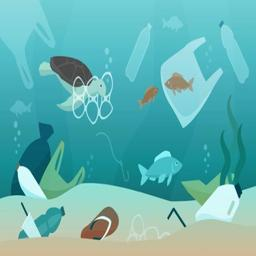

In [7]:
img = Image.open(docs[1].metadata['image'])
display(img)

In [8]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=50)
splits = text_splitter.split_documents(docs)

In [9]:
splits

[Document(metadata={'source': 'C:/project4/chat/RAG데이터2.pdf', 'page': 0, 'news': 'https://www.youtube.com/watch?v=qqDpDzl3RlU', 'image': 'C:/project4/chat/images/resize_0.jpg'}, page_content='[해양쓰레기  소개] \n해양쓰레기란  해양 및 바닷가에  유입, 투기, 방치된  폐기물을  말합니다 . \n \n[해양쓰레기  종류] \n해양쓰레기는  육상에서  발생한  육상 기인 해양쓰레기와  해상에서  발생한  해상 기인 쓰레기가  있\n습니다 . 육상 기인 쓰레기  종류는  플라스틱 , 음료수  병 등 유리 재질 제품, 비닐봉지 , 스티로폼  음\n식용기 , 담배 꽁초 등이 있습니다 . 해상 기인 쓰레기  종류는  플라스틱 , 스티로폼  부표, 통발과  그\n물 밧줄같은  어구, 낚시 용품 등이 있습니다 .'),
 Document(metadata={'source': 'C:/project4/chat/RAG데이터2.pdf', 'page': 0, 'news': 'https://www.youtube.com/watch?v=qqDpDzl3RlU', 'image': 'C:/project4/chat/images/resize_0.jpg'}, page_content='물 밧줄같은  어구, 낚시 용품 등이 있습니다 . \n  \n[해양쓰레기  발생원인 ]  \n일상적인  생활에서  배출되는  쓰레기는  하천과  강을 따라 바다로  들어옵니다 . 특히 장마철  폭우나  \n태풍이  있을 때 함부로  버려진  길거리  쓰레기 , 망가진  구조물 , 방치된  쓰레기  더미 등이 바다로  \n이동하게  됩니다 . 부피가  작고 가벼운  것들은  폭우가  아니어도  수시로  바람에  날리거나  배수로를  \n거쳐 바다로  들어오기도  합니다 . 혹은 해안이나  배에서  직접 바다로  들어옵니다 .'),
 Document(metadata={'s

In [10]:
# 임베딩 후 DB에 저장
vectorstore = Chroma.from_documents(documents=splits, embedding=OpenAIEmbeddings(), persist_directory='C:/project4/chat/ImgDB')

In [11]:
retriever = vectorstore.as_retriever(search_kwargs={"k":3})

In [12]:
a = retriever.invoke("해양쓰레기 발생원인")

In [13]:
a

[Document(metadata={'image': 'C:/project4/chat/images/resize_0.jpg', 'news': 'https://www.youtube.com/watch?v=qqDpDzl3RlU', 'page': 0, 'source': 'C:/project4/chat/RAG데이터2.pdf'}, page_content='[해양쓰레기  소개] \n해양쓰레기란  해양 및 바닷가에  유입, 투기, 방치된  폐기물을  말합니다 . \n \n[해양쓰레기  종류] \n해양쓰레기는  육상에서  발생한  육상 기인 해양쓰레기와  해상에서  발생한  해상 기인 쓰레기가  있\n습니다 . 육상 기인 쓰레기  종류는  플라스틱 , 음료수  병 등 유리 재질 제품, 비닐봉지 , 스티로폼  음\n식용기 , 담배 꽁초 등이 있습니다 . 해상 기인 쓰레기  종류는  플라스틱 , 스티로폼  부표, 통발과  그\n물 밧줄같은  어구, 낚시 용품 등이 있습니다 .'),
 Document(metadata={'image': 'C:/project4/chat/images/resize_0.jpg', 'news': 'https://www.youtube.com/watch?v=qqDpDzl3RlU', 'page': 0, 'source': 'C:/project4/chat/RAG데이터2.pdf'}, page_content='물 밧줄같은  어구, 낚시 용품 등이 있습니다 . \n  \n[해양쓰레기  발생원인 ]  \n일상적인  생활에서  배출되는  쓰레기는  하천과  강을 따라 바다로  들어옵니다 . 특히 장마철  폭우나  \n태풍이  있을 때 함부로  버려진  길거리  쓰레기 , 망가진  구조물 , 방치된  쓰레기  더미 등이 바다로  \n이동하게  됩니다 . 부피가  작고 가벼운  것들은  폭우가  아니어도  수시로  바람에  날리거나  배수로를  \n거쳐 바다로  들어오기도  합니다 . 혹은 해안이나  배에서  직접 바다로  들어옵니다 .'),
 Document(metadata={'i

In [14]:
vectorstore.get(where={'image':''})

{'ids': [],
 'embeddings': None,
 'documents': [],
 'uris': None,
 'data': None,
 'metadatas': [],
 'included': [<IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

In [16]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

# 모델
chatgpt = ChatOpenAI(
    model_name="gpt-4o-mini",
    temperature = 0
)

vectorstore = Chroma(embedding_function=OpenAIEmbeddings(), persist_directory='C:/project4/chat/ImgDB')
retriever = vectorstore.as_retriever(search_kwargs={"k":3})

In [28]:
# 퀴즈 내용
from collections import Counter

# 결과 리스트 (예: vectorstore.get의 결과)
image_results = ['aadfda.jpg', 'bafdafda.jpg', 'dd.jpg']

# 빈도 계산
counter = Counter(image_results)

# 가장 많이 등장한 결과 추출
most_common_image, count = counter.most_common(1)[0]
print(f"가장 많이 나온 이미지: {most_common_image}, 등장 횟수: {count}")


가장 많이 나온 이미지: aadfda.jpg, 등장 횟수: 1


In [46]:
# 퀴즈 내용
from collections import Counter

theme_list = ["해양쓰레기 발생원인", "해양쓰레기 현황", "해양쓰레기 피해 및 위험성", "해양쓰레기 피해 사례", "태평양 쓰레기섬", "미세플라스틱", "허베이스피릿호 원유유출 사고", "호주 검은 공 사건", "약품 사고", "폐어구에 걸린 돌고래", "우리나라 바다 거북", "상괭이"]

results = []
for theme in theme_list:
    result = f"오늘의 퀴즈는 '{theme}' 부분에서 나올 것으로 예상됩니다!\n"
    context = await retriever.ainvoke(theme)
    
    images = []
    links = []
    for con in context:
        images.append(con.metadata['image'])
        links.append(con.metadata['news'])
    counter_img = Counter(images)
    counter_link =  Counter(links)
    
    img, _ = counter_img.most_common(1)[0]
    link, _ = counter_link.most_common(1)[0]
    
    with open(img, "rb") as image_file:
        image_data = image_file.read()
        encoded_image = base64.b64encode(image_data).decode('utf-8') # 바이트 데이터
    
    context = format_docs(context)
    
    ans = await chatgpt.ainvoke(f'{context}를 요약해서 100자 이내로 알려주고, "입니다/습니다"로 끝나는 격식체 문장을 사용해 주세요')
    result += ans.content
    
    results.append({"result": result, "image": encoded_image, "link": link})


In [47]:
results

[{'result': "오늘의 퀴즈는 '해양쓰레기 발생원인' 부분에서 나올 것으로 예상됩니다!\n해양쓰레기는 육상과 해상에서 발생하며, 주로 플라스틱, 유리병, 비닐봉지 등으로 구성됩니다. 쓰레기는 하천을 통해 바다로 유입되며, 원유유출 사고로 해양오염이 심각해지는 경우도 있습니다.",
  'image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAEAAQADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxE

In [48]:
for r in results:
    print(r['result'])
    print(r['link'])
    print()

오늘의 퀴즈는 '해양쓰레기 발생원인' 부분에서 나올 것으로 예상됩니다!
해양쓰레기는 육상과 해상에서 발생하며, 주로 플라스틱, 유리병, 비닐봉지 등으로 구성됩니다. 쓰레기는 하천을 통해 바다로 유입되며, 원유유출 사고로 해양오염이 심각해지는 경우도 있습니다.
https://www.youtube.com/watch?v=qqDpDzl3RlU

오늘의 퀴즈는 '해양쓰레기 현황' 부분에서 나올 것으로 예상됩니다!
국내 해양쓰레기는 매년 약 12만~14만 톤이 바다로 유입되며, 육지에서 65%, 바다에서 35%가 발생합니다. 주로 홍수와 수산업에서 발생합니다.
https://www.youtube.com/watch?v=qqDpDzl3RlU

오늘의 퀴즈는 '해양쓰레기 피해 및 위험성' 부분에서 나올 것으로 예상됩니다!
해양쓰레기는 어업 생산성을 저하시켜 조업 지연과 추가 비용을 초래하며, 바다 생태계를 위협하고 국가 간 갈등을 유발합니다. 해양쓰레기의 문제는 심각합니다.
https://www.youtube.com/watch?v=vwz2wX0DnQI

오늘의 퀴즈는 '해양쓰레기 피해 사례' 부분에서 나올 것으로 예상됩니다!
해양쓰레기는 해양 생물에게 심각한 피해를 줍니다. 플라스틱을 섭취한 생물들은 위장에 플라스틱이 가득 차 죽음에 이르게 되며, 종 다양성도 감소하고 있습니다. 이는 해양 생태계에 부정적인 영향을 미칩니다.
https://youtu.be/W_jD4CyfU8I?si=Kvs-XyLDeW5vRH-z

오늘의 퀴즈는 '태평양 쓰레기섬' 부분에서 나올 것으로 예상됩니다!
태평양의 쓰레기섬은 해양 폐기물이 해류에 의해 모여 형성된 곳으로, 해양쓰레기로 인해 생물 서식지가 파괴되고 국가 간 갈등이 발생할 수 있습니다.
https://www.youtube.com/watch?v=yrdMIXrxx4E

오늘의 퀴즈는 '미세플라스틱' 부분에서 나올 것으로 예상됩니다!
해양 플라스틱 오염이 심각하며, 거북이 1마리가 38개의 해양 플라스틱을 섭식하고 있습니다. 미세 플라스틱은 해

In [50]:
import pickle

with open('results1.pkl', 'wb') as f:
    pickle.dump(results, f)
    